# FPGheArt - Week 4 exercise

### Lorenzo Buriola - 2021860
### Filippo Conforto - 2021856
### Lorenzo Domenichetti - 2011653


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import normalized_mutual_info_score as NMI
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib as mpl
from pylab import cm
import hdbscan

# PART 1

## Data loading and 3d visualization

In [2]:
data = np.loadtxt("DATA/data_t-SNE_310101_d5_R100_e1_N800.dat")
y_data = np.concatenate((np.full(80,0),np.full(240,1),np.full(480,2)))
data = pd.DataFrame(data)
data.shape

(800, 5)

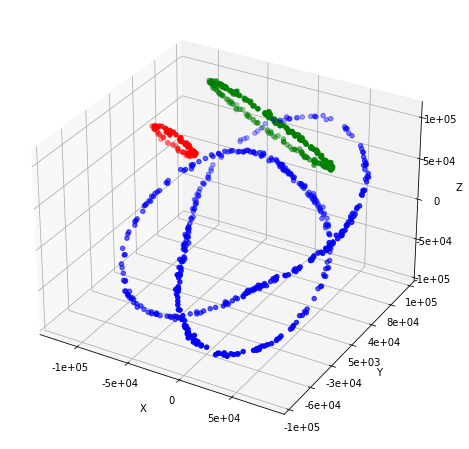

In [3]:
# Fixing random state for reproducibility
np.random.seed(12345)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data.iloc[:80,0], data.iloc[:80,1], data.iloc[:80,2], marker='o', color = 'red')
ax.scatter(data.iloc[80:320,0], data.iloc[80:320,1], data.iloc[80:320,2], marker='o', color = 'green')
ax.scatter(data.iloc[320:,0], data.iloc[320:,1], data.iloc[320:,2], marker='o', color = 'blue')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xticks(np.arange(-100000,100000,50000))
ax.set_yticks(np.arange(-100000,120000,35000))
ax.set_zticks(np.arange(-100000,120000,50000))

ax.zaxis._axinfo['label']['space_factor'] = 5
ax.yaxis._axinfo['label']['space_factor'] = 5.8

ax.get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p:  '%2.e' % x if x!= 0 else x))
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p:  '%2.e' % x if x!= 0 else x))
ax.get_zaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p:  '%2.e' % x if x!= 0 else x))
plt.savefig("FirstThreeFeatures.pdf")
plt.show()

## PCA result

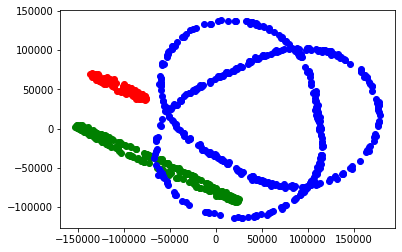

In [4]:
pca = PCA(n_components=2)
data_pca_twodim = pca.fit_transform(data)

plt.scatter(data_pca_twodim[:80,0], data_pca_twodim[:80,1] ,color = 'red')
plt.scatter(data_pca_twodim[80:320,0], data_pca_twodim[80:320,1] ,color = 'green')
plt.scatter(data_pca_twodim[320:,0], data_pca_twodim[320:,1], color = 'blue')
plt.show()

Note how the PCA reduction manages to visually separate the cluster.

## TSNE 2D

In [5]:
# TSNE in 2D with various perplexities

data_embedded_list = []
perplexities = [5,30,50,100]

for i in perplexities:
    data_embedded_list.append(TSNE(n_components=2, perplexity = i, init = 'random', random_state = 12345, square_distances=True).fit_transform(data))

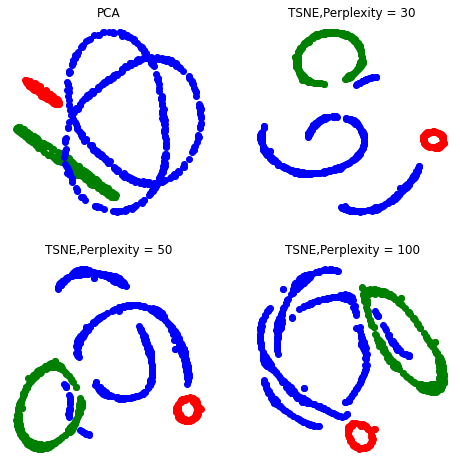

In [6]:
np.random.seed(12345)

fig,ax = plt.subplots(2,2,figsize = (8,8))


ax = ax.flatten()

for i in range(1,4):
    ax[i].axis("off")
    ax[i].scatter(data_embedded_list[i][:80,0], data_embedded_list[i][:80,1], marker='o', color = 'red')
    ax[i].scatter(data_embedded_list[i][80:320,0], data_embedded_list[i][80:320,1], marker='o', color = 'green')
    ax[i].scatter(data_embedded_list[i][320:,0], data_embedded_list[i][320:,1], marker='o', color = 'blue')
    ax[i].set_xlabel('X')
    ax[i].set_title(f"TSNE,Perplexity = {perplexities[i]}")
    
ax[0].axis("off")
ax[0].scatter(data_pca_twodim[:80,0], data_pca_twodim[:80,1] ,color = 'red')
ax[0].scatter(data_pca_twodim[80:320,0], data_pca_twodim[80:320,1] ,color = 'green')
ax[0].scatter(data_pca_twodim[320:,0], data_pca_twodim[320:,1], color = 'blue')
ax[0].set_ylabel('Y')
ax[0].set_title(f"PCA")
plt.savefig("tsne_multipleperplexities.pdf")
plt.show()

The best result is obtained using an intermediate value of perplexity (30)

## TSNE 3D

We tried also to apply TSNE with final output 3D space 

In [7]:
data_embedded_list_3D = []
perplexities = [5,30,50,100]

for i in perplexities:
    data_embedded_list_3D.append(TSNE(n_components=3, perplexity = i, init = 'random', random_state = 12345).fit_transform(data))

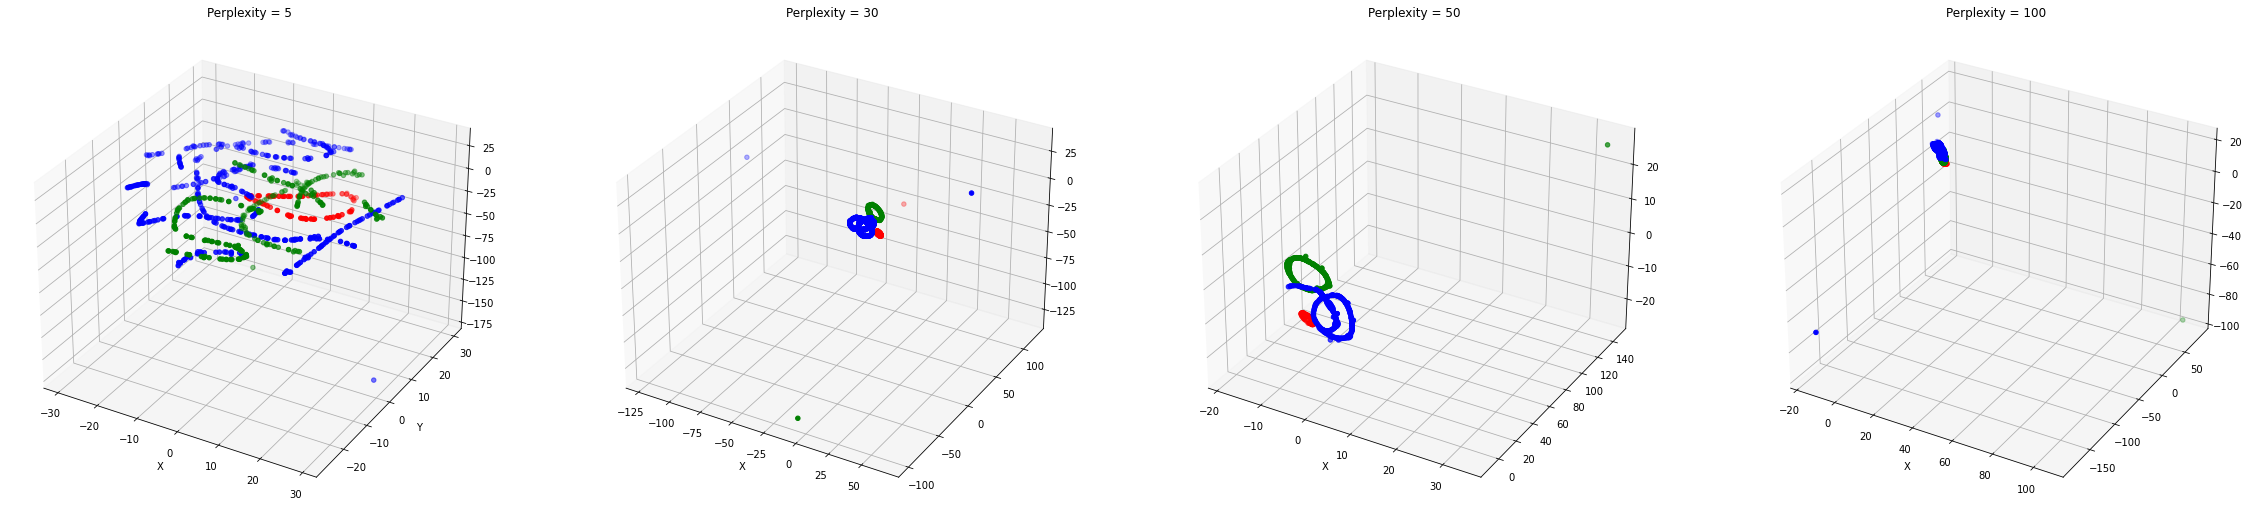

In [8]:
np.random.seed(12345)

fig = plt.figure(figsize = (40,20))

ax =[]

ax.append(fig.add_subplot(141, projection='3d'))
ax.append(fig.add_subplot(142, projection='3d'))
ax.append(fig.add_subplot(143, projection='3d'))
ax.append(fig.add_subplot(144, projection='3d'))

for i in range(4):
    
    ax[i].scatter(data_embedded_list_3D[i][:80,0], data_embedded_list_3D[i][:80,1],data_embedded_list_3D[i][:80,2], marker='o', color = 'red')
    ax[i].scatter(data_embedded_list_3D[i][80:320,0], data_embedded_list_3D[i][80:320,1], data_embedded_list_3D[i][80:320,2], marker='o', color = 'green')
    ax[i].scatter(data_embedded_list_3D[i][320:,0], data_embedded_list_3D[i][320:,1], data_embedded_list_3D[i][320:,2], marker='o', color = 'blue')
    ax[i].set_xlabel('X')
    ax[i].set_title(f"Perplexity = {perplexities[i]}")
    
ax[0].set_ylabel('Y')
plt.show()

TSNE gives some good results also in three dimensions. Nonetheless, some points are scattered far away and so the visualization of the plots is not so nice.

## Typical minimium distance between points

We choose a number k of neighbours and calculate the minimum distance between the point and is k-th neighour

In [9]:
min_sample_range = [1,3,5,10,15]

neigh = NearestNeighbors(n_neighbors=16)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)
distances = np.sort(distances, axis = 0)
distances = distances[:,min_sample_range]

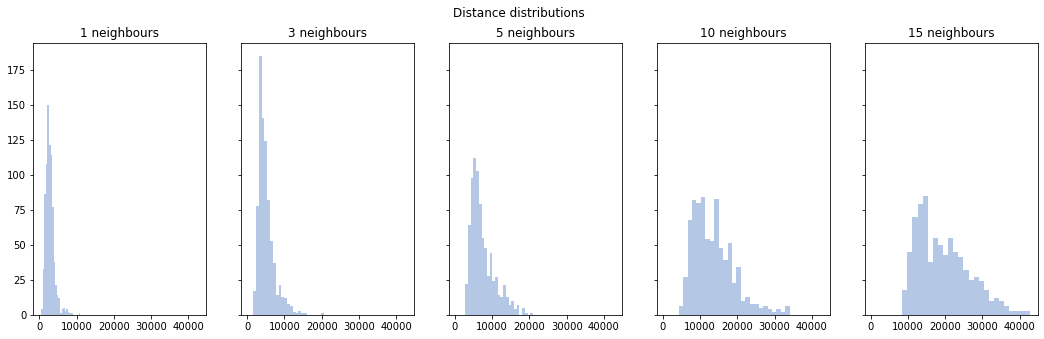

In [10]:
fig, ax = plt.subplots(1,5, figsize = (18,5), sharex = True, sharey = True)
plt.suptitle("Distance distributions")
for i in range(5):
    ax[i].hist(distances[:,i], bins = 25, alpha = 0.7, color = "#94B0DA")
    ax[i].set_title(f"{min_sample_range[i]} neighbours")

plt.show()


Of course, the distance between farer neighbours increases accordingly.
Moreover, the distribution seem to have the same shape. 
As we will see in the following part, DBSCAN performs best with 3 and 5 minpts. And the values of eps choosen will be such that the whole distribution stays on the left of such value.


## Eps estimate

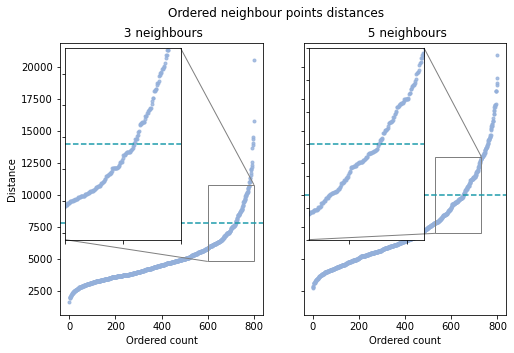

In [11]:
fig, ax = plt.subplots(1,2, figsize = (8,5), sharex = True, sharey = True)
values = [5000,7800,10000,20000,25000]
plt.suptitle("Ordered neighbour points distances")
subax = []
for i in range(1,3):
    
    ax[i-1].scatter(range(len(distances[:,i])), np.sort(distances[:,i]), alpha = 0.8, color = "#94B0DA", marker = ".")
    #ax[i].axhline(values[i])
    ax[i-1].set_title(f" {min_sample_range[i]} neighbours")
    ax[i-1].axhline(values[i],0,800, color="#1B9AAA", linestyle="--")
    ax[i-1].set_xlabel("Ordered count")
    subax.append(zoomed_inset_axes(ax[i-1], 2.5, loc = 2))
    subax[i-1].set_xlim(600-(i-1)*70,800-(i-1)*70)
    subax[i-1].set_ylim(values[i]-3000,values[i]+3000)
    subax[i-1].axhline(values[i],0,800, color="#1B9AAA", linestyle="--")
    subax[i-1].scatter(range(len(distances[:,i])), np.sort(distances[:,i]), alpha = 0.8, color = "#94B0DA", marker = ".")
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    mark_inset(ax[i-1], subax[i-1], loc1=1, loc2=3,fc="none", ec="0.5")
    plt.draw()

ax[0].set_ylabel("Distance")


plt.savefig("ord_distances.pdf")
plt.show()


A [paper](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) suggests a way to find the best *eps* parameter depending on the choosen *minPts* value (- linked of course to DBSCAN).
This point is linked to a so called critical point, in which the curve has the highest change in the derivative. The idea is shown using horizontal lines.

Anyhow, in this case the best eps parameter is far from the ones this method would have predicted. 

## DBSCAN

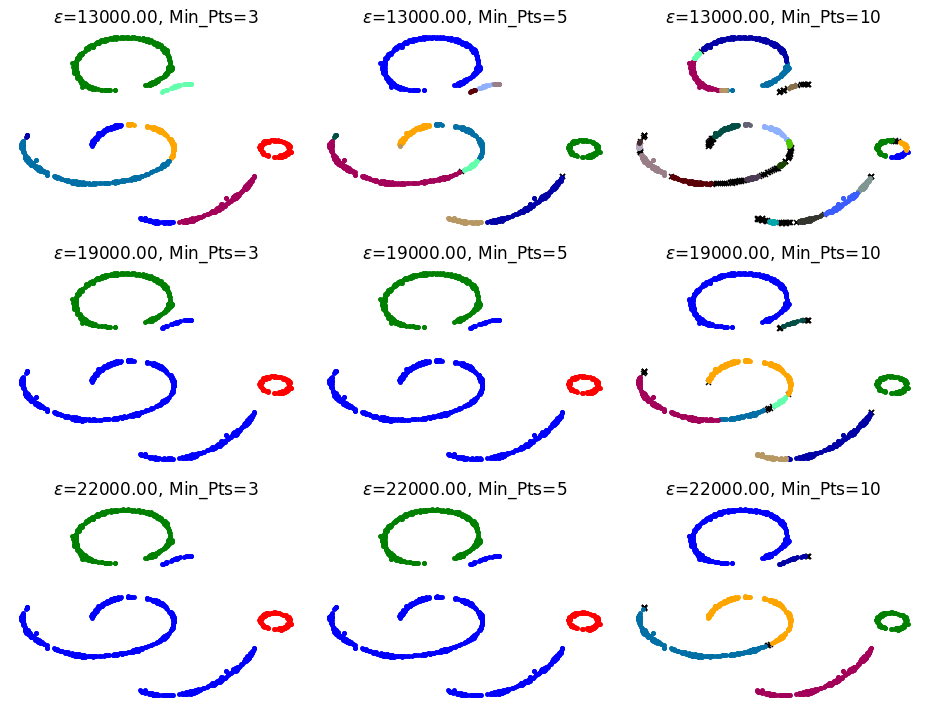

In [12]:
eps_range = [ 13000, 19000, 22000]
min_sample_range = [3,5,10]
cpalette = ["red", "green", "blue", "orange", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
    
def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        if yu == -1:
            ax.scatter(X[pos,0], X[pos,1], c='k', s=25, marker = "x")
        else:
            ax.scatter(X[pos,0], X[pos,1], c=cpalette[i%len(cpalette)], s=15, marker = "o")

fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(13,10), sharex = True, sharey = True)
y_pred = []

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(data)
        y = model.labels_
        y_pred.append(y)
        plotting_ax(data_embedded_list[1],y,ax[i,j])
        ax[i,j].axis("off")
        ax[i,j].set_title(r'$\epsilon$=%.2f, Min_Pts=%i'%(eps,min_samples),fontsize=17)
        ax[2,j].set_xlabel("X")
        ax[i,0].set_ylabel("Y")
plt.tight_layout(h_pad=1)
plt.savefig("DBscanGRID.pdf")
plt.show()


Best result is obtained with eps = 19000-22000 and minPts = 3/5.
All clusters seem to be perfectly recognised. The hint given from the minimum distance in 5Dimensions in not of course yet present in the 2D reduction. 

There are no explicit links also to the method propsed by the paper for the *eps* estimation. We might suppose that this method also depends on the density and dimension of data considered.

In [13]:
NMIs = []
for y_p in y_pred:
    NMIs.append(NMI(y_data,y_p))
NMIs = np.asarray(NMIs).reshape(3,3)

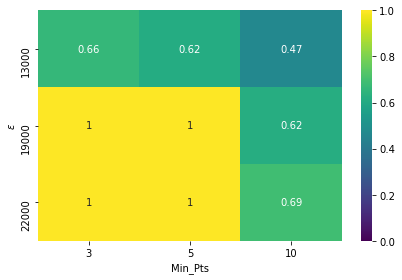

In [14]:
sns.heatmap(NMIs, annot = True, vmin=0, vmax = 1,  xticklabels = min_sample_range, yticklabels = eps_range, cmap = 'viridis')
plt.xlabel("Min_Pts")
plt.ylabel(r"$\epsilon$")
#plt.title("NMI DBSCAN")
plt.tight_layout()
plt.savefig("DBscanNMI.pdf")
plt.show()


## OPTICS

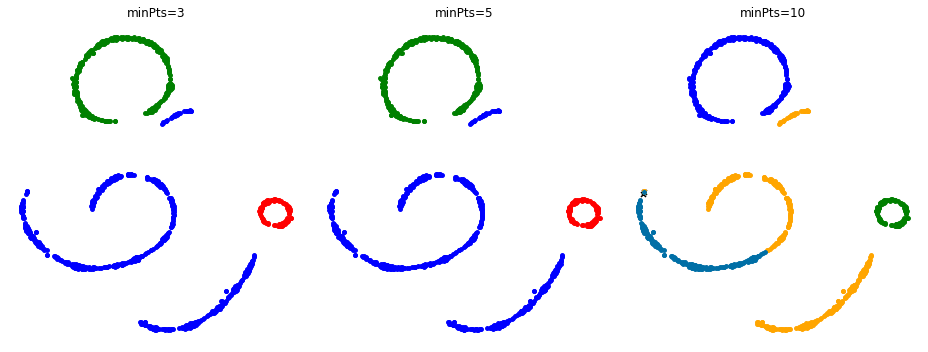

In [15]:
eps_range = [ 13000, 16000, 19000, 22000]
min_sample_range = [3,5,10]
        
fig, ax = plt.subplots(1,len(min_sample_range),figsize=(13,5), sharex = True, sharey = True)
y_pred = []

for j, min_samples in enumerate(min_sample_range):
    model = OPTICS(min_samples=min_samples, cluster_method='dbscan', max_eps = 25000)
    model.fit(data)
    y = model.labels_
    y_pred.append(y)
    plotting_ax(data_embedded_list[1],y,ax[j])
    ax[j].axis("off")
    ax[j].set_title('minPts=%i'%(min_samples))
    ax[j].set_xlabel("X")
    ax[0].set_ylabel("Y")
plt.savefig("OPTICSGRID.pdf")
plt.tight_layout(h_pad=0.5)
plt.show()


Best result is obtained with eps = 19000-22000 and minPts = 3/5.
All clusters seem to be perfectly recognised. The hint given from the minimum distance in 5Dimensions in not of course yet present in the 2D reduction. 

There are no explicit links also to the method propsed by the paper for the *eps* estimation. We might suppose that this method also depends on the density and dimension of data considered.

In [16]:
NMIs = []
for y_p in y_pred:
    NMIs.append(NMI(y_data,y_p))
NMIs = np.asarray(NMIs).reshape(1,3)

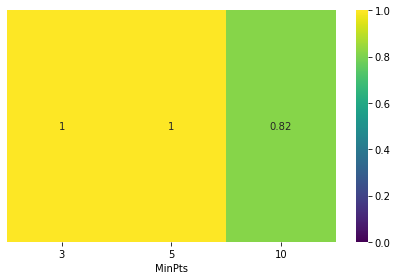

In [17]:
sns.heatmap(NMIs, annot = True, vmin=0, vmax = 1,  xticklabels = min_sample_range, yticklabels = [], cmap = 'viridis')
plt.xlabel("MinPts")
plt.tight_layout()
plt.savefig("OPTICSNMI.pdf")
#plt.title("NMI for OPTICS")

## TSNE and DBSCAN

We can easily show how DBSCAN works very well after one TSNE is applied, as we expect from a "visual" point of view.


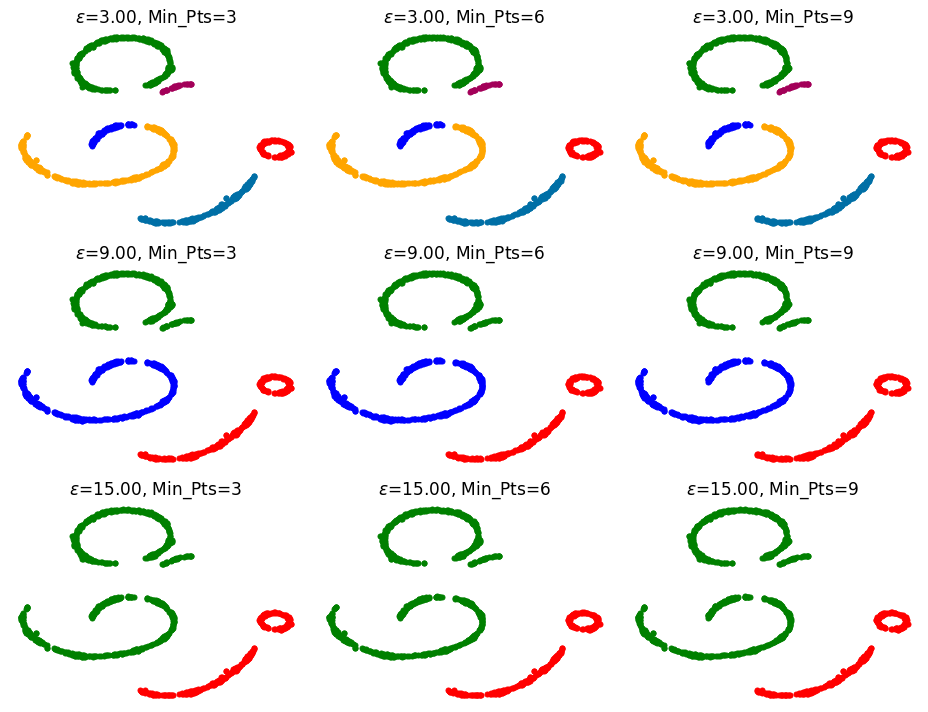

In [18]:
eps_range = [3, 9, 15]
min_sample_range = [3,6,9]
cmap = cm.get_cmap('plasma', 6)  # matplotlib color palette name, n colors
cpalette = ["red", "green", "blue","orange", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        if yu == -1:
            ax.scatter(X[pos,0], X[pos,1], c='k', s=25, marker = "x")
        else:
            ax.scatter(X[pos,0], X[pos,1], c=cpalette[i%len(cpalette)], s=25, marker = "o")
        
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(13,10), sharex = True, sharey = True)
y_pred = []

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(data_embedded_list[1])
        y = model.labels_
        y_pred.append(y)
        plotting_ax(data_embedded_list[1],y,ax[i,j])
        ax[i,j].axis("off")
        ax[i,j].set_title(r'$\epsilon$=%.2f, Min_Pts=%i'%(eps,min_samples),fontsize=17)
        ax[2,j].set_xlabel("X")
        ax[i,0].set_ylabel("Y")
plt.tight_layout(h_pad=1)
plt.savefig("DBscanGRID.pdf")
plt.show()

The best results are achieved using eps = 3, and minpts = 9. 
Even if the paramters are called the same, one must not compare the parameters used in the previous case with respect to this one. In particular, the distance is computed in 36 and 2 dimensions respectively.

In [19]:
NMIs = []
for y_p in y_pred:
    NMIs.append(NMI(y_data,y_p))
NMIs = np.asarray(NMIs).reshape(3,3)

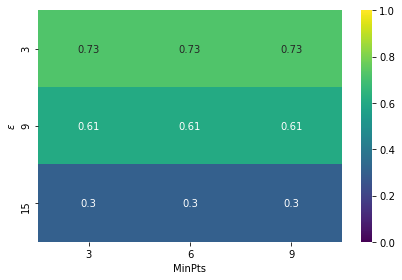

In [20]:
sns.heatmap(NMIs, annot = True, vmin=0, vmax = 1,  xticklabels = min_sample_range, yticklabels = eps_range, cmap = 'viridis')
plt.xlabel("MinPts")
plt.ylabel(r"$\epsilon$")

plt.tight_layout(h_pad=0)
plt.savefig("36DIM_TSNE_DBSCAN_NMI.pdf")

# PART 2

## Data loading and 3d visualization

In [7]:
x = np.loadtxt("DATA/x_M5_N400.csv")
y_data = np.loadtxt("DATA/y_M5_N400.csv")

## TSNE

In [8]:
x_embedded_list = []
perplexities = [10,25,50,100]

for i in perplexities:
    x_embedded_list.append(TSNE(n_components=2, perplexity = i, init = 'random', random_state =12345, metric = "manhattan", square_distances=True).fit_transform(x))

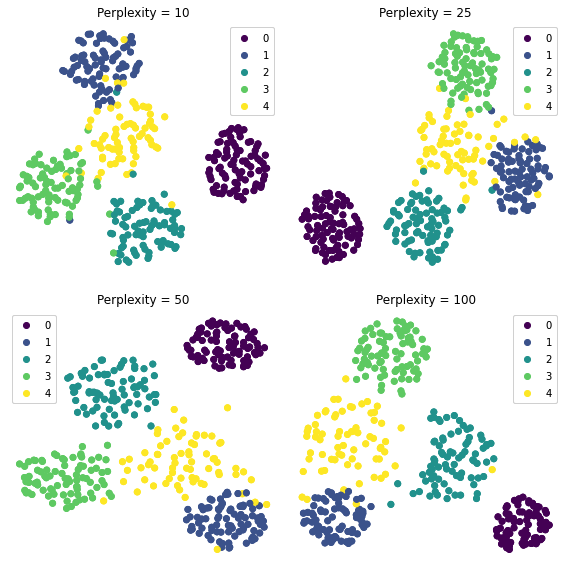

In [9]:
fig,ax = plt.subplots(2,2,figsize = (8,8))

ax = ax.flatten()
for i in range(4):
    
    ax[i].scatter(x_embedded_list[i][:,0], x_embedded_list[i][:,1], c =  y_data)
    scatter = ax[i].scatter(x_embedded_list[i][:,0], x_embedded_list[i][:,1], c=y_data)

    legend1 = ax[i].legend(*scatter.legend_elements(),
                    loc="best")
    ax[i].axis("off")
    ax[i].add_artist(legend1)
    ax[i].set_xlabel('X')
    ax[i].set_title(f"Perplexity = {perplexities[i]}")
    
ax[0].set_ylabel('Y')
plt.tight_layout(h_pad = 2)
plt.savefig("36DIM_TSNE.pdf")
plt.show()

Even with perplexity = 25 - the best choice - the points with labels 1 and 4 are not completely distinguishable. 

This may be linked to a similarity of these two type of data in the initial sets.


## Typical minimium distance between points

We repeat the analysis over the minimum distance distribution between points.

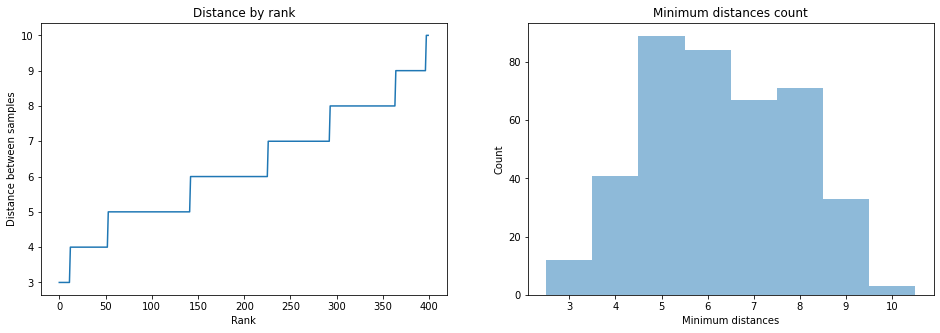

In [10]:
x = pd.DataFrame(x)


x_min_dist = []
for i in x.index:
    x_min_dist.append(np.abs(((x.drop(i)-x.loc[i]))).sum(axis = 1).min())

fig,ax = plt.subplots(1,2,figsize = (16,5))  
x_min_dist.sort()
ax[0].plot(x_min_dist)
ax[0].set_xlabel("Rank")
ax[0].set_ylabel("Distance between samples")
ax[0].set_title("Distance by rank")
ax[1].hist(x_min_dist, bins = np.arange(3,12)-.5, alpha = 0.5)
ax[1].set_xlabel("Minimum distances")
ax[1].set_ylabel("Count")
ax[1].set_title("Minimum distances count")
plt.show()

Minimum distances does not change a lot, and this is expected.

## DBSCAN

We now try using different eps values and different minPts. 

In this case we only have a limited choice of the eps values, as distances can be of only integers (taking the l1-manhattan distance in the 36 dim).


The eps parameters we chose are 5,7,9 and no other one seems to have any better behaviour.

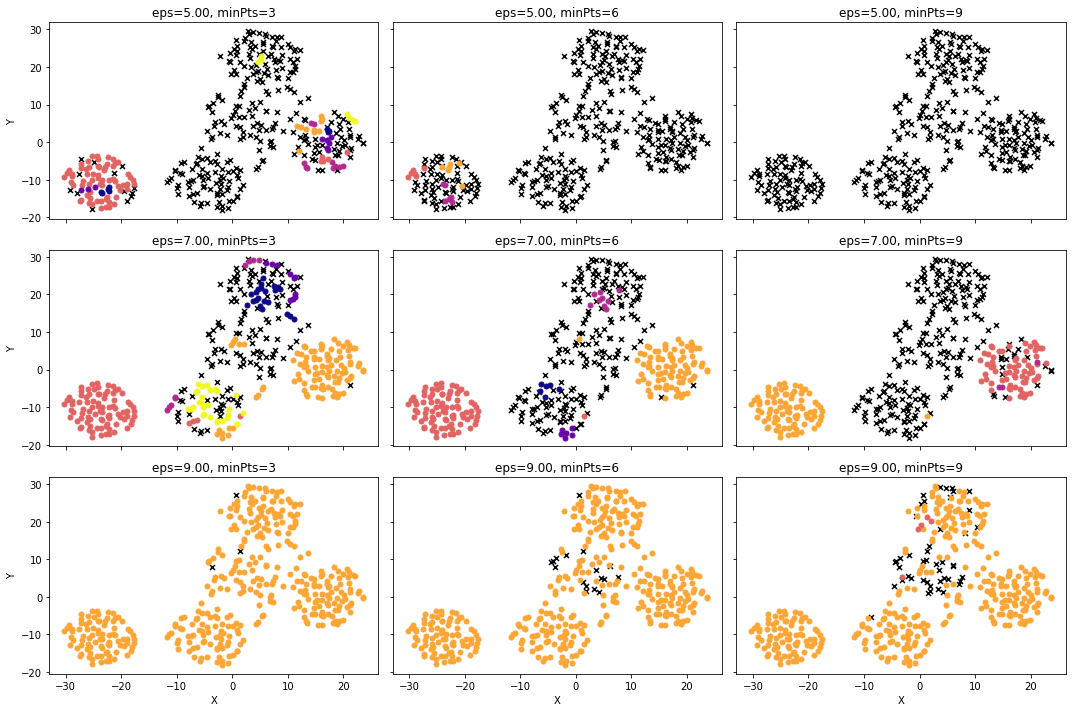

In [11]:
eps_range = [5, 7, 9]
min_sample_range = [3, 6, 9]
cmap = cm.get_cmap('plasma', 6)  # matplotlib color palette name, n colors
cpalette = []

for i in range(cmap.N):
    rgb = cmap(i)[:3]  # will return rgba, we take only first 3 so we get rgb
    cpalette.append(mpl.colors.rgb2hex(rgb))
    
cpalette = list(reversed(cpalette))
    
def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        if yu == -1:
            ax.scatter(X[pos,0], X[pos,1], c='k', s=25, marker = "x")
        else:
            ax.scatter(X[pos,0], X[pos,1], c=cpalette[i%len(cpalette)], s=25, marker = "o")
        
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,10), sharex = True, sharey = True)
y_pred = []

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples, metric = 'manhattan')
        model.fit(x)
        y_pred.append(model.labels_)
        y = model.labels_
        plotting_ax(x_embedded_list[1],y,ax[i,j])
        ax[i,j].set_title('eps=%.2f, minPts=%i'%(eps,min_samples))
        ax[2,j].set_xlabel("X")
        ax[i,0].set_ylabel("Y")
plt.tight_layout(h_pad=1)
plt.savefig("36DIM_DBSCAN.pdf")
plt.show()

In [12]:
NMIs = []
for y_p in y_pred:
    NMIs.append(NMI(y_data,y_p))
NMIs = np.asarray(NMIs).reshape(3,3)

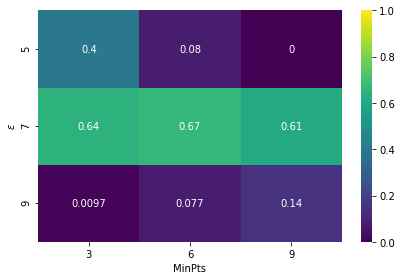

In [13]:
sns.heatmap(NMIs, annot = True, vmin=0, vmax = 1,  xticklabels = min_sample_range, yticklabels = eps_range, cmap = 'viridis')
plt.xlabel("MinPts")
plt.ylabel(r"$\epsilon$")
plt.tight_layout(h_pad=0)
plt.savefig("36DIM_DBSCAN_NMI.pdf")

One particular choice of parameters seems to work better.

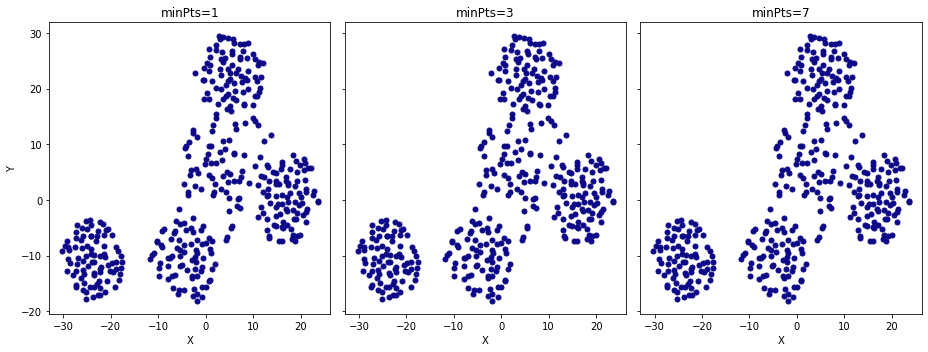

In [14]:
min_sample_range = [1, 3, 7]
cmap = cm.get_cmap('plasma', 6)  # matplotlib color palette name, n colors
cpalette = []

for i in range(cmap.N):
    rgb = cmap(i)[:3]  # will return rgba, we take only first 3 so we get rgb
    cpalette.append(mpl.colors.rgb2hex(rgb))
        
fig, ax = plt.subplots(1,len(min_sample_range),figsize=(13,5), sharex = True, sharey = True)
y_pred = []

for j, min_samples in enumerate(min_sample_range):
    model = OPTICS(min_samples=min_samples, cluster_method='dbscan', max_eps = 8)
    model.fit(x)
    y = model.labels_
    y_pred.append(y)
    plotting_ax(x_embedded_list[1],y,ax[j])
    ax[j].set_title('minPts=%i'%(min_samples))
    ax[j].set_xlabel("X")
    ax[0].set_ylabel("Y")
plt.savefig("36DIM_OPTICSGRID.pdf")
plt.tight_layout(h_pad=0.5)
plt.show()

OPTICS perfoms badly with these data

## HDBSCAN

Here we used a different algorithm based on DBSCAN that couples hierarchical and density-based clustering 

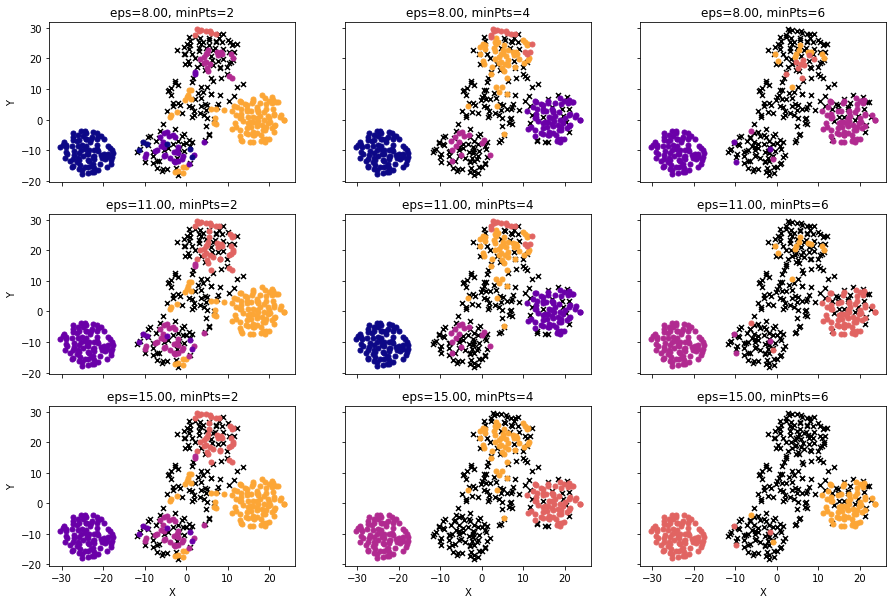

In [19]:
eps_range = [8,11,15]
min_sample_range = [2,4,6]
cmap = cm.get_cmap('plasma', 6)  # matplotlib color palette name, n colors
cpalette = []

for i in range(cmap.N):
    rgb = cmap(i)[:3]  # will return rgba, we take only first 3 so we get rgb
    cpalette.append(mpl.colors.rgb2hex(rgb))
    
cpalette = list(reversed(cpalette))
    
def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        if yu == -1:
            ax.scatter(X[pos,0], X[pos,1], c='k', s=40, marker = "x")
        else:
            ax.scatter(X[pos,0], X[pos,1], c=cpalette[i%len(cpalette)], s=40, marker = "o")
        
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,10), sharex = True, sharey = True)
y_pred = []

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = hdbscan.HDBSCAN(algorithm='best',metric='l1', min_cluster_size=eps, min_samples=min_samples)
        model.fit(x)
        y_pred.append(model.labels_)
        y = model.labels_
        plotting_ax(x_embedded_list[1],y,ax[i,j])
        ax[i,j].set_title('eps=%.2f, minPts=%i'%(eps,min_samples))
        ax[2,j].set_xlabel("X")
        ax[i,0].set_ylabel("Y")

#plt.tight_layout(h_pad=1)
#plt.savefig("36DIM_HDBSCAN.pdf")
#plt.show()

In [16]:
NMIs = []
for y_p in y_pred:
    NMIs.append(NMI(y_data,y_p))
NMIs = np.asarray(NMIs).reshape(3,3)

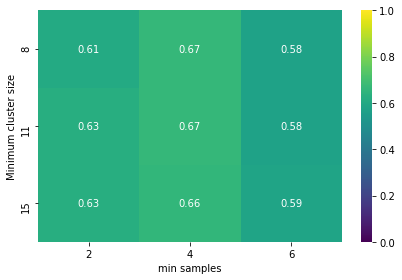

In [17]:
#fig = plt.figure(figsize = (20,10))
sns.heatmap(NMIs, annot = True, vmin=0, vmax = 1,  xticklabels = min_sample_range, yticklabels = eps_range, cmap = 'viridis')
plt.xlabel("min samples")
plt.ylabel("Minimum cluster size")

plt.tight_layout(h_pad=0)
plt.savefig("36DIM_HDBSCAN_NMI.pdf")

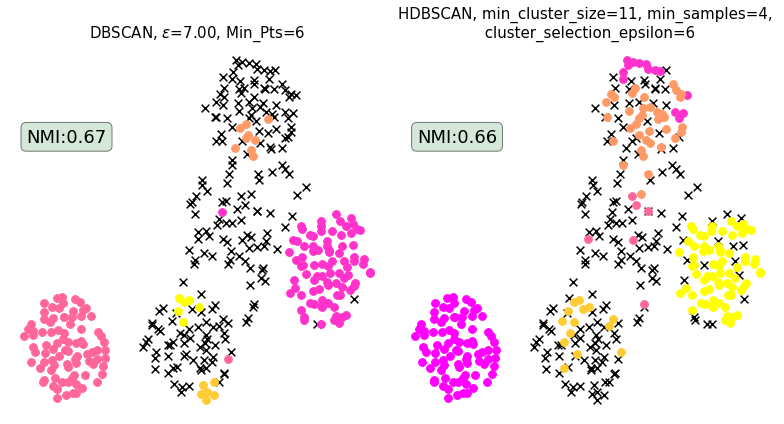

In [54]:
cmap = cm.get_cmap('spring', 6)  # matplotlib color palette name, n colors
cpalette = []

for i in range(cmap.N):
    rgb = cmap(i)[:3]  # will return rgba, we take only first 3 so we get rgb
    cpalette.append(mpl.colors.rgb2hex(rgb))
    
#cpalette = list(reversed(cpalette))
    

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        if yu == -1:
            ax.scatter(X[pos,0], X[pos,1], c='k', s=60, marker = "x")
        else:
            ax.scatter(X[pos,0], X[pos,1], c=cpalette[i%len(cpalette)], s=60, marker = "o")

fig, ax = plt.subplots(1,2, figsize = (11,6), sharex = True, sharey = True)
model = hdbscan.HDBSCAN(algorithm='best',metric='l1', min_cluster_size=6, min_samples=4, cluster_selection_epsilon = 6)
model.fit(x)
y_hdb = model.labels_
model = DBSCAN(eps=7, min_samples=6, metric = 'manhattan')
model.fit(x)
y_db = model.labels_
plotting_ax(x_embedded_list[1],y_db,ax[0])
plotting_ax(x_embedded_list[1],y_hdb,ax[1])
ax[0].axis("off")
ax[1].axis("off")

ax[0].set_title(r'DBSCAN, $\epsilon$=%.2f, Min_Pts=%i'%(7,6), fontsize = 15)
ax[1].set_title('HDBSCAN, min_cluster_size=%i, min_samples=%i, \n cluster_selection_epsilon=%i'%(11,4,6), fontsize = 15)

ax[0].set_xlabel("X")
ax[1].set_xlabel("X")
props = dict(boxstyle='round', facecolor='#ABD1B5', alpha=0.5)

ax[0].text(-30, 20, "NMI:{:.2}".format(NMI(y_data,y_db)), fontsize=18,
        verticalalignment='top', bbox=props)
ax[1].text(-30, 20, "NMI:{:.2}".format(NMI(y_data,y_hdb)), fontsize=18,
        verticalalignment='top', bbox=props)
ax[0].set_ylabel("Y")
plt.tight_layout(h_pad=1)
plt.savefig("RES_36DIM.pdf")

DBSCAN and HDBSCAN perform similarly concerning the NMI score but visually one can see that HDBSCAN manages to understand better some clusters.

## TSNE and DBSCAN

We can easily show how DBSCAN works very well after one TSNE is applied, as we expect from a "visual" point of view.


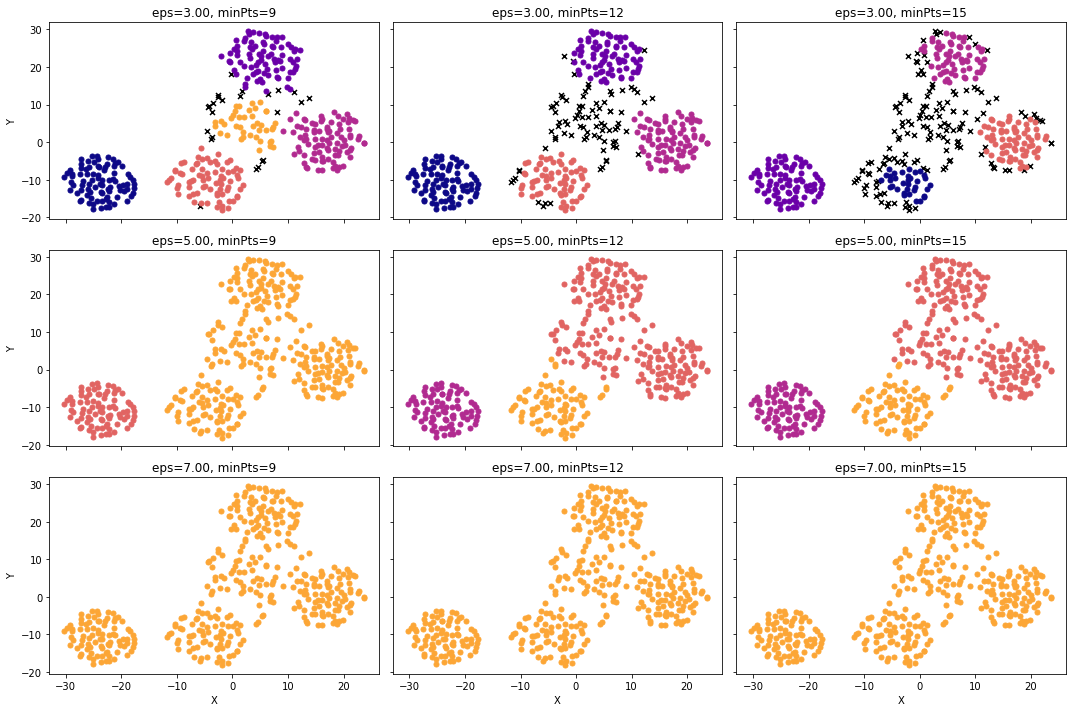

In [33]:
eps_range = [3,5,7]
min_sample_range = [9,12,15]
cmap = cm.get_cmap('plasma', 6)  # matplotlib color palette name, n colors
cpalette = []

for i in range(cmap.N):
    rgb = cmap(i)[:3]  # will return rgba, we take only first 3 so we get rgb
    cpalette.append(mpl.colors.rgb2hex(rgb))
    
cpalette = list(reversed(cpalette[:-1]))
    
def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        if yu == -1:
            ax.scatter(X[pos,0], X[pos,1], c='k', s=25, marker = "x")
        else:
            ax.scatter(X[pos,0], X[pos,1], c=cpalette[i%len(cpalette)], s=25, marker = "o")
        
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,10), sharex = True, sharey = True)
y_pred = []

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(x_embedded_list[1])
        y_pred.append(model.labels_)
        y = model.labels_
        plotting_ax(x_embedded_list[1],y,ax[i,j])
        ax[i,j].set_title('eps=%.2f, minPts=%i'%(eps,min_samples))
        ax[2,j].set_xlabel("X")
        ax[i,0].set_ylabel("Y")

plt.tight_layout(h_pad=1)
plt.savefig("36DIM_TSNE_DBSCAN.pdf")
plt.show()

The best results are achieved using eps = 3, and minpts = 9. 
Even if the paramters are called the same, one must not compare the parameters used in the previous case with respect to this one. In particular, the distance is computed in 36 and 2 dimensions respectively.

In [34]:
NMIs = []
for y_p in y_pred:
    NMIs.append(NMI(y_data,y_p))
NMIs = np.asarray(NMIs).reshape(3,3)

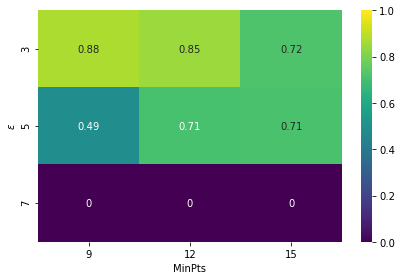

In [35]:
sns.heatmap(NMIs, annot = True, vmin=0, vmax = 1,  xticklabels = min_sample_range, yticklabels = eps_range, cmap = 'viridis')
plt.xlabel("MinPts")
plt.ylabel(r"$\epsilon$")

plt.tight_layout(h_pad=0)
plt.savefig("36DIM_TSNE_DBSCAN_NMI.pdf")

## KMEANS - AGG_CLUSTERING

In order to understand why dbscan fails with this particular dataset, we try to use two other different clustering algorithms: KMEANS with euclidean distances and Hierarchical with manhattan distances.

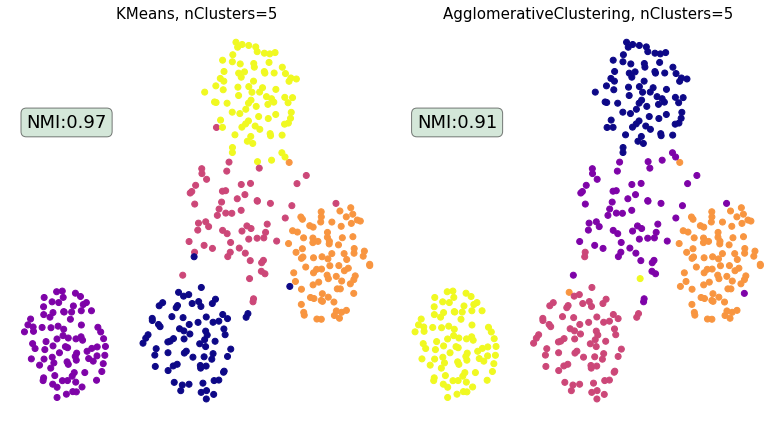

In [28]:
model = KMeans(n_clusters = 5)
model_agg = AgglomerativeClustering(n_clusters = 5, affinity = "manhattan", linkage = 'complete')

y_k = model.fit(x).labels_
y_agg = model_agg.fit(x).labels_
fig, ax = plt.subplots(1,2, figsize = (11,6))
ax[0].scatter(x_embedded_list[1][:,0], x_embedded_list[1][:,1], c = y_k, cmap = 'plasma')
ax[1].scatter(x_embedded_list[1][:,0], x_embedded_list[1][:,1], c = y_agg, cmap = 'plasma')
ax[0].set_xlabel("X")
ax[1].set_ylabel("Y")
ax[0].set_title("KMeans, nClusters=5", fontsize = 15)
ax[1].set_title("AgglomerativeClustering, nClusters=5", fontsize = 15)
ax[0].axis("off")
ax[1].axis("off")
props = dict(boxstyle='round', facecolor='#ABD1B5', alpha=0.5)
ax[0].text(-30, 20, "NMI:{:.2}".format(NMI(y_data,y_k)),  fontsize=18,
        verticalalignment='top', bbox=props)
ax[1].text(-30, 20, "NMI:{:.2}".format(NMI(y_data,y_agg)),    fontsize=18,
        verticalalignment='top', bbox=props)
plt.tight_layout(h_pad=0)
plt.savefig("kMeans-AggCl.pdf")
plt.show()

In [37]:
NMI(y_data,y_k)

0.9672219939185083

In [38]:
NMI(y_data,y_agg)

0.9106308566058522

As noticed, the two agglomerative algorithms actually work with the original 36-dim data. On the other hand, the DBSCAN algorithm fails to reconstruct correctly the clusters. 
Moreover, the agglomerative clustering algorithm manages to find the right ensamble also with the "manhattan" distance we exploited for the DBSCAN algorithm. 
The algorithms that use distance work better than dbscan that uses density.

Our hypothesis is that this density is not a good descriptor in this dataset, and also points are distributed in a grid in 36 dimension, so space is higly discretized as long as the only values we can have are only zeros and ones.

As show a density-based algorithm as dbscan works properly in case of data obtained with PCA or TSNE dimensionality reduction methods, this links the inefficiency of DBSCAN not to the set of data in general, but to the 36-dimensional space.